In [1]:
import numpy as np
import PyFlowFW as pf

from mlxtend.data import loadlocal_mnist
import platform
import os

PyFlow imported


In [2]:
def load_mnist(train_path,test_path):
    X_train, Y_train = loadlocal_mnist(
            images_path=os.path.join(train_path,'train-images.idx3-ubyte'), 
            labels_path=os.path.join(train_path,'train-labels.idx1-ubyte')
            )
    
    X_test, Y_test = loadlocal_mnist(
            images_path=os.path.join(test_path,'t10k-images.idx3-ubyte'), 
            labels_path=os.path.join(test_path,'t10k-labels.idx1-ubyte')
            )
    
    return X_train,Y_train,X_test,Y_test

In [3]:
dataLoader=pf.DataLoader.DataLoader()
train_path="MNIST_dataset\\train"
test_path="MNIST_dataset\\test"

X_train,Y_train,X_test,Y_test=load_mnist(train_path,test_path)
Y_train=np.reshape(Y_train,(Y_train.shape[0],1))
Y_test=np.reshape(Y_test,(Y_test.shape[0],1))

X_train=X_train/255.0
X_test=X_test/255.0

print(Y_train[5])

Y_train=dataLoader.toOneHot(Y_train,10)
Y_test=dataLoader.toOneHot(Y_test,10)

Y_train[5]

[2]


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

18000
42000
units : 128 , activation : relu , layer no : 1
units : 10 , activation : softmax , layer no : 2
Training loss after epoch 0: 4.485609
Accuracy: 0.030337078651685397
Validation metric :
Accuracy: 0.03423333333333334
Training loss after epoch 1: 4.481238
Accuracy: 0.048314606741573035
Validation metric :
Accuracy: 0.05329444444444445
Training loss after epoch 2: 4.475310
Accuracy: 0.05730337078651686
Validation metric :
Accuracy: 0.06147777777777778
Training loss after epoch 3: 4.466703
Accuracy: 0.05617977528089888
Validation metric :
Accuracy: 0.06543333333333333
Training loss after epoch 4: 4.453891
Accuracy: 0.058426966292134834
Validation metric :
Accuracy: 0.06696666666666667
Training loss after epoch 5: 4.434792
Accuracy: 0.060674157303370786
Validation metric :
Accuracy: 0.0669388888888889
Training loss after epoch 6: 4.406234
Accuracy: 0.060674157303370786
Validation metric :
Accuracy: 0.06639444444444445
Training loss after epoch 7: 4.363694
Accuracy: 0.061797752808

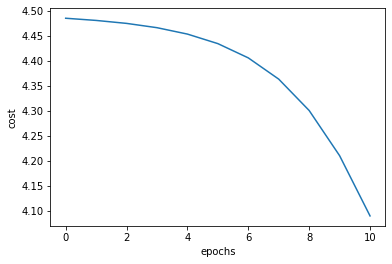

In [4]:
model=pf.Models.Sequential([
    pf.Layers.Dense(128,"relu",1),
    pf.Layers.Dense(10,"softmax",2)
])

model.compile(optimizer=pf.Optimizers.SGD(),loss=pf.Losses.CategoricalCrossEntropyLoss(),metric=pf.Metrics.CategoricalAccuracy())
history=model.fit(X_train,Y_train,11,470,0.3)

In [7]:
probas,p=model.predict(X_test,10)

In [8]:
acc=pf.Metrics.CategoricalAccuracy()
acc(probas,Y_test)

Accuracy: 0.06865000000000002


array([[7.],
       [2.],
       [1.],
       ...,
       [9.],
       [1.],
       [6.]])